# Lab 5-3: Winds and Orographic Precipitation
---

Our goal here is to combine what we learned in Lab 2 regarding atmospheric thermodyanamics to better understand rain rates along a mountain.  This lab draws on the Precipitation lecture notes, as well as on a paper written by Gerard Roe in 2005. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

Note that wind calculations will be added in a future iteration, for now wind information will be given.

**Saturated vapor pressure is a function of air temperature.**
In lab 2 (and in the Shuttleworth book), we used the formula, as shown here, to calculate saturated vapor pressure in units of kPa with an input of temperature in degrees C.
$$ e_{sat} = 0.6108*exp(\frac{17.27T}{237.3+T}) $$

In Gerard Roe's paper, he describes this equation with the [Clausius-Clapyron](https://en.wikipedia.org/wiki/Clausius%E2%80%93Clapeyron_relation) relationship, which he writes as
$$ e_{sat} = 6.112*exp(\frac{aT}{b+T}) $$
where here $e_{sat}$ is in millibars or hPa, a = 17.67, and b=243.5$^\circ$C.

Now, it's always somewhat frustrating when multiple reputable sources have different equations for the same thing.  It's a good idea to pause and check to see if they're really quite close to the same thing.  One way to do this is a quick plot. 

In [2]:
T_curve=list(range(-40,40))
T_curve=np.asarray(T_curve)
# We turn it into a numpy array so that we can use numpy to calculate esat for the entire array

esat1 = 0.6108*np.exp((17.27*T_curve)/(237.3+T_curve))
# this formula outputs esat in kPa, if we multiply by 10, we get hPa, easier for comparison
esat1 = esat1*10

a=17.67
b=243.5
esat2 = 6.112*np.exp((a*T_curve)/(b+T_curve))


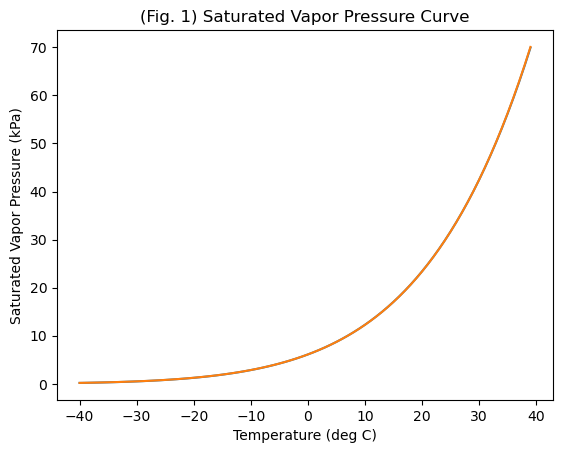

In [3]:
# Create a new figure.
plt.figure()

# Use the plot() function to plot the year on the x-axis, peak flow values on
# the y-axis with an open circle representing each peak flow value.
plt.plot(T_curve, # our x value
         esat1 # our y value
         )
plt.plot(T_curve, # our x value
         esat2 # our y value
         )
# Label the axes and title.
plt.xlabel('Temperature (deg C)')
plt.ylabel('Saturated Vapor Pressure (kPa)')
plt.title('(Fig. 1) Saturated Vapor Pressure Curve');

Try commenting out one line in the above code so that only one plots.  These are virtually indistinguishable.  They are different numerical approximations of the same thing. [Wikipedia](https://en.wikipedia.org/wiki/Vapour_pressure_of_water) has an interesting review of a number of other formulas and their accuracy at different air temperatures, if you are interested. In many cases, errors arise at high temperatures (e.g., for applications in pressure cooking or boilers). For the purposes of our class, either of the formulas here is fine. 

## Pause and think
The plot above is very important to our considerations of precipitation, storms, floods, and flood probabilities.  The first step for precipitation is for the atmosphere to carry enough moisture to generate a lot of precipitation.  As we discussed in class, the heaviest rain events in the Pacific Northwest are from [atmospheric rivers](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2011EO320001), which are warmer than average storms carrying a lot of moisture from the tropics in a narrow band.  

The plot above should also give you pause as you think about warming temperatures.  Within typical atmospheric temperatures, the saturated vapor pressure increases rapidly with temperature (6-7% per degree C) -- this has led many people to postulate that atmospheric rivers in a future warmer climate will carry more water and thus produce more intense rainfall.

## Continuing with our equations
In class, we talked about the mixing ratio being approximately equal to the specific humidity and being approximately equal to 0.622(ev/p) .  Lab 2-3 shows that this is true.  Following Gerard, 2005 (as in the printed lecture notes), we can use this equation specifically for saturated conditions to get:
$$ q_{sat}(T,z) = 0.622(\frac{e_{sat}(T)}{p(z)}) $$

If we combine this with the ideal gas law and the hydrostatic equation, and assume that atmospheric temperature varies linearly with height, as
$$ T = T_0 +\Gamma z $$
where $\Gamma$ is the environmental temperature lapse rate,
and integrating from a height $z$ to the surface, we get
$$ \rho q_{sat}(z) = \rho_0 q_{0 sat}\exp{(\frac{-z}{H_m})} $$
where
$$ H_m = - \frac{b}{a \Gamma} $$
and a = 17.67, and b=243.5$^\circ$C, as above.

We can define **condensation of water vapor** as the change in saturated moisture content with time.
$$ C = - \frac{d(\rho q_{sat})}{dt} ~= - \frac{\partial(\rho q_{sat})}{\partial z} \frac{dz}{dt} = - w \frac{\partial(\rho q_{sat})}{\partial z}$$

What this says is that condensation is a function of vertical velocity, w, multiplied by the rate of change saturated vapor pressure with height.  It goes down with height, which causes condensation as air rises.

Next, for orographic precipitation, we presume that the mountain slope is the primary source of lifting, i.e., vertical velocity.  Combing the equations above, defining the mountain slope at $\nabla z_s$, and integrating over a total vertical column of the atmosphere, we get the following:

$$ S = - \int_{z_s}^{top} C dz $$

$$ S = - \int_{z_s}^{top} \vec{u} \cdot \nabla z_s \frac{d}{dz} [\rho q_{sat}] dz $$

$$ S = \rho_0 q_{0 sat}  \vec{u} \cdot \nabla z_s \exp{(\frac{-z_s}{H_m})} $$

where 
$S$ is the column-integrated condensation rate (formation of water droplets)

$\rho_0$ is inital air density (kg/m$^3$)

$q_{0 sat}$ is the initial specific humidity (g water/kg air)

$\vec{u}$ is the average incoming wind speed (m/s)

$\nabla z_s$ is the topographic slope, if we define x as the direction of the wind, dz/dx (-)

$z_s$ is the surface elevation (must be in km if the lapse rate is in km)

$H_m$ is the scale height for moisture as defined above ($-\frac{b}{a \Gamma}$  (km)

and

$\Gamma$ is the environmental lapse rate (can presume -6 $^{\circ}$C /km)



In [7]:
# Read in a .xlsx file of the height transect along a mountain range.
data = pd.read_csv('elevation-profile_Olympics.csv')
# You may also substitude with 'elevation-profile_MtRainier.csv' if you want something else.
data.head()

,lat,long,elevation_feet,distance_mi
0,47.70329,-124.40506,130.75,0.00
1,47.70516,-124.39059,161.51,0.69
2,47.70702,-124.37611,175.66,1.37
3,47.70889,-124.36164,210.99,2.06
4,47.71075,-124.34716,240.02,2.74


These data are from the USGS [Streamstats](https://streamstats.usgs.gov/ss/) page, using their "Elevation Profile Tool" under "Exploration Tools" -- after drawing a line in line with where I imagine the primary wind from an atmospheric river will hit, I scrolled down in the output and exported a .csv -- (Note that I had to change their headers to not have parentheses to work with this notebook.)  

We will presume that the wind is directly in line with the drawn transect, so that wind dot the gradient of elevation is the same as wind speed times the vertical change with distance here, dz/dx.  

Convert to metric units, and then plot the transect data.

1 foot = 0.3048 m

1 mile = 1609.34 m


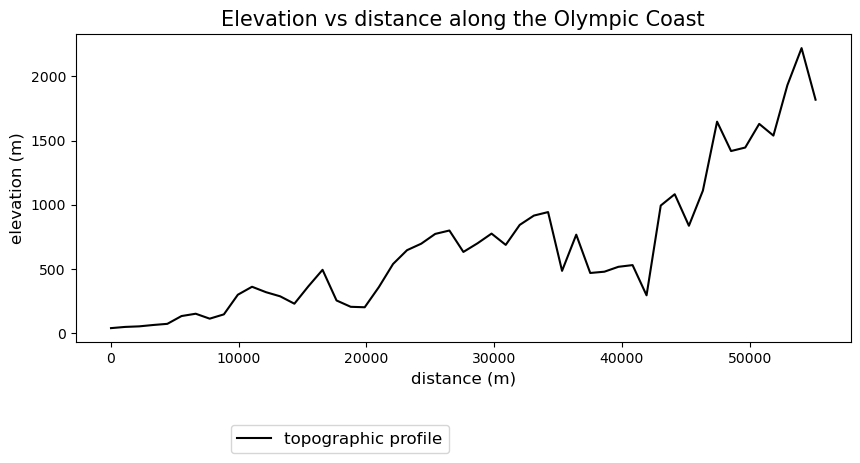

In [12]:
elev_m = 0.3048*data.elevation_feet
distance_m = 1609.34*data.distance_mi


fig, ax = plt.subplots(figsize=(10,4))

ax.plot(distance_m,elev_m,c='k',label='topographic profile');

ax.set_title('Elevation vs distance along the Olympic Coast', fontsize=15)
ax.set_xlabel('distance (m)', fontsize=12)
ax.set_ylabel('elevation (m)', fontsize=12);
plt.legend(loc=(0.2,-0.36), fontsize=12);

Now, we can calculate the slope along this line, and presuming we know the wind speed aligned with it, we can calculate the condensentation rate all along the line.  If raindrops that condense fall out immediately and right below where they condense, we can estimate rain rates.  If we do this, what physical processes are we neglecting, and how do you think we could improve on this?

In [1]:
# First, let's calculate dz/dx along our slope.
dx = np.diff(distance_m)
dz = np.diff(elev_m)
dzdx = dz / dx

# Now, lets assume some typical values 
ro0 = 1.2 # kg/m^3
u = 10 #m/s
qsat0 = 8 # g/kg
Gamma = -6 # degrees/km
a=17.67
b=243.5
Hm = -b/(a*Gamma)

row = 1000 #kg/m^3. density of water


# Now, combine these with the equation above and plot S/row along the line.

NameError: name 'np' is not defined